<a href="https://colab.research.google.com/github/lucasbrassioli/fiap/blob/master/Conceitos_e_Aplica%C3%A7%C3%B5es_em_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Drive Instance
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import metrics

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Verify environ
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Fiap/Conceitos_e_Aplicacoes_em_Data_Mining"

In [ ]:
#Verify Path
%cd /content/gdrive/My Drive/Fiap/Conceitos_e_Aplicacoes_em_Data_Mining

/content/gdrive/My Drive/Fiap/Conceitos_e_Aplicacoes_em_Data_Mining


In [ ]:
#Verify file
%ls

UseAmarelo.csv


In [ ]:
#read file
df = pd.read_csv('UseAmarelo.csv',sep=';')
df[:2]

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,Language,Reach,Desktop Reach,Mobile Reach,Twitter Social Echo,Facebook Social Echo,Reddit Social Echo,National Viewership,Engagement,AVE,Sentiment,Key Phrases,Input Name,Keywords,Twitter Authority,Tweet Id,Twitter Id,Twitter Client,Twitter Screen Name,Twitter User Profile Url,Twitter Bio,Twitter Followers,Twitter Following,Alternate Date Format,Time,State,City,Document Tags
0,26-Jul-2020 03:24PM,NaN,https://twitter.com/Joaovc_28/statuses/1287453...,NaN,RT @BradoRevista: Junte-se a nós e #UseAmarelo...,Twitter,@joaovc_28,Unknown,NaN,Portuguese,314,0,0,NaN,NaN,NaN,0,NaN,2.9,Positive,próximos dias,Adhoc Search Export,#UseAmarelo,5.0,'1287453671039664129',"9,29152E+17",Twitter for Android,Jão 🇧🇷,https://twitter.com/Joaovc_28,Mágico das frases endiabradas sem mel,314.0,605.0,"Jul 26, 2020",3:24 PM,NaN,NaN,NaN
1,26-Jul-2020 03:23PM,NaN,https://twitter.com/Joaovc_28/statuses/1287453...,NaN,"RT @BradoRevista: Em 26 de junho, aniversário ...",Twitter,@joaovc_28,Unknown,NaN,Portuguese,314,0,0,NaN,NaN,NaN,0,NaN,2.9,Neutral,NaN,Adhoc Search Export,#UseAmarelo,5.0,'1287453611019182087',"9,29152E+17",Twitter for Android,Jão 🇧🇷,https://twitter.com/Joaovc_28,Mágico das frases endiabradas sem mel,314.0,605.0,"Jul 26, 2020",3:23 PM,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Date', 'Headline', 'URL', 'Opening Text', 'Hit Sentence', 'Source',
       'Influencer', 'Country', 'Subregion', 'Language', 'Reach',
       'Desktop Reach', 'Mobile Reach', 'Twitter Social Echo',
       'Facebook Social Echo', 'Reddit Social Echo', 'National Viewership',
       'Engagement', 'AVE', 'Sentiment', 'Key Phrases', 'Input Name',
       'Keywords', 'Twitter Authority', 'Tweet Id', 'Twitter Id',
       'Twitter Client', 'Twitter Screen Name', 'Twitter User Profile Url',
       'Twitter Bio', 'Twitter Followers', 'Twitter Following',
       'Alternate Date Format', 'Time', 'State', 'City', 'Document Tags'],
      dtype='object')

In [ ]:
df.dtypes          

Date                         object
Headline                    float64
URL                          object
Opening Text                float64
Hit Sentence                 object
Source                       object
Influencer                   object
Country                      object
Subregion                   float64
Language                     object
Reach                         int64
Desktop Reach                 int64
Mobile Reach                  int64
Twitter Social Echo         float64
Facebook Social Echo        float64
Reddit Social Echo          float64
National Viewership           int64
Engagement                  float64
AVE                         float64
Sentiment                    object
Key Phrases                  object
Input Name                   object
Keywords                     object
Twitter Authority           float64
Tweet Id                     object
Twitter Id                   object
Twitter Client               object
Twitter Screen Name         

In [ ]:
print(df.isna().sum())

Date                            0
Headline                    19411
URL                             0
Opening Text                19411
Hit Sentence                    0
Source                          0
Influencer                      0
Country                         0
Subregion                   19411
Language                        0
Reach                           0
Desktop Reach                   0
Mobile Reach                    0
Twitter Social Echo         19411
Facebook Social Echo        19411
Reddit Social Echo          19411
National Viewership             0
Engagement                  19111
AVE                             0
Sentiment                       0
Key Phrases                  7033
Input Name                      0
Keywords                        1
Twitter Authority             352
Tweet Id                        0
Twitter Id                      0
Twitter Client                  0
Twitter Screen Name             1
Twitter User Profile Url        0
Twitter Bio   

In [ ]:
df_ini = df
df = df[['Twitter Authority','Twitter Followers','Twitter Following','Reach','Language','Country','Sentiment']]
df = df.drop_duplicates()

In [ ]:
df.describe(include='all')

,Twitter Authority,Twitter Followers,Twitter Following,Reach,Language,Country,Sentiment
count,17405.000000,1.761300e+04,17686.000000,1.771400e+04,17714,17714,17714
unique,NaN,NaN,NaN,NaN,34,124,4
top,NaN,NaN,NaN,NaN,Portuguese,Brazil,Neutral
freq,NaN,NaN,NaN,NaN,16519,9472,12982
mean,4.400977,7.097334e+04,2758.172227,7.056867e+04,NaN,NaN,NaN
std,1.840649,7.128967e+05,16815.981035,7.108814e+05,NaN,NaN,NaN
min,1.000000,1.000000e+00,1.000000,0.000000e+00,NaN,NaN,NaN
25%,3.000000,7.100000e+01,201.250000,6.825000e+01,NaN,NaN,NaN
50%,4.000000,2.690000e+02,484.000000,2.660000e+02,NaN,NaN,NaN
75%,6.000000,9.520000e+02,1222.000000,9.437500e+02,NaN,NaN,NaN


In [ ]:
df.replace(['nan','NaN','Unknown'],'unknown', inplace = True)
df_clear = df.dropna()
df_clear.shape

(17339, 7)

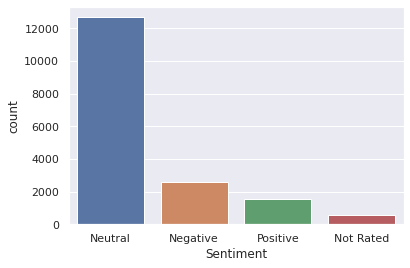

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Sentiment", data=df_clear, order = df_clear['Sentiment'].value_counts().index)

In [ ]:
df_clear['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Not Rated'], dtype=object)

In [ ]:
conditions = [
    (df_clear['Sentiment'] == 'Positive'),
    (df_clear['Sentiment'] == 'Neutral'),
    (df_clear['Sentiment'] == 'Negative'),
    (df_clear['Sentiment'] == 'Not Rated')
]
choices = [1, 2, 3, 4]
df_clear['Ct_Sentiment'] = (np.select(conditions, choices)).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


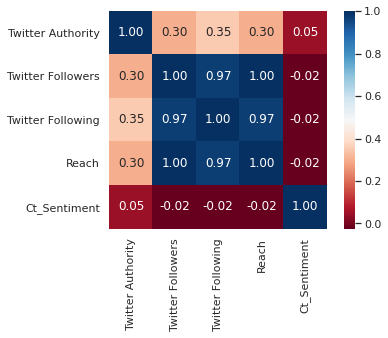

In [ ]:
corr = df_clear.corr()
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

In [ ]:
def get_features_names(column_transfomer, input_features):
    output_features = []
    
    founded = []
    for transfomer in column_transfomer.transformers_:
        if hasattr(transfomer[1], 'get_feature_names'):
            tmp = transfomer[1].get_feature_names(input_features=transfomer[2])
            output_features += list(tmp)
        elif transfomer[1] == 'passthrough':
            output_features += list(input_features[transfomer[2]])
        else:
            output_features += list(transfomer[2])
   
    return output_features

In [ ]:
# X-> Features, y-> target
X = pd.DataFrame(df_clear)
y = df_clear['Ct_Sentiment']

In [ ]:
tmp = X.dtypes
features_cat = list(tmp[tmp=='O'].index)
features_not_cat = list(tmp[tmp!='O'].index)

In [ ]:
transfomers_list = [('one_hot', OneHotEncoder(handle_unknown='ignore', sparse=False), features_cat),
                    ('normalizer', MinMaxScaler(), features_not_cat)]

In [ ]:
column_tranformer = ColumnTransformer(transformers=transfomers_list, remainder='passthrough')
column_tranformer

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('one_hot',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=False),
                                 ['Language', 'Country', 'Sentiment']),
                                ('normalizer',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['Twitter Authority', 'Twitter Followers',
                                  'Twitter Following', 'Reach',
                                  'Ct_Sentiment'])],
                  verbose=False)

In [ ]:
column_tranformer = column_tranformer.fit(X, y)

In [ ]:
X_t = column_tranformer.transform(X)
X_t

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.38341232e-03, 2.38959626e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.38341232e-03, 2.38959626e-05, 3.33333333e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.52284924e-05, 7.17642328e-06, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.36390728e-03, 5.34414500e-06, 3.33333333e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.53195756e-03, 2.97745221e-06, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.63488276e-04, 5.11511021e-06, 6.66666667e-01]])

In [ ]:
output_features = get_features_names(column_tranformer, input_features=X.columns) # obtem nomes das features na saida 
df_t = pd.DataFrame(X_t, columns=output_features) # cria dataframe de saida

In [ ]:
df_t.columns

Index(['Language_Afrikaans', 'Language_Albanian', 'Language_Basque',
       'Language_Catalan', 'Language_Croatian', 'Language_Dutch',
       'Language_English', 'Language_Estonian', 'Language_Filipino',
       'Language_Finnish',
       ...
       'Country_unknown', 'Sentiment_Negative', 'Sentiment_Neutral',
       'Sentiment_Not Rated', 'Sentiment_Positive', 'Twitter Authority',
       'Twitter Followers', 'Twitter Following', 'Reach', 'Ct_Sentiment'],
      dtype='object', length=167)

In [ ]:
X=df_t
y=df_t['Ct_Sentiment']

In [ ]:
# Split dataset into training set and test set
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3) # 70% training and 30% test

In [ ]:
nn = keras.Sequential([
      keras.layers.Input(167),
      #keras.layers.Dense(250, activation='relu'),
      #keras.layers.Dense(150, activation='relu'),
      keras.layers.Dense(75, activation='relu'),
      keras.layers.Dense(50, activation='relu'),
      keras.layers.Dense(4, activation='sigmoid'),
      keras.layers.Dense(4, activation='softmax')
])
nn.compile(optimizer='adam' , loss='mean_squared_error', 
           metrics=[
            metrics.MeanSquaredError(),
            metrics.CategoricalAccuracy(),
           ])

In [ ]:
history = nn.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=50,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    # validation_data=(x_val, y_val),
)

Epoch 1/50
190/190 [==============================] - 1s 2ms/step - loss: 0.0574 - mean_squared_error: 0.0574 - categorical_accuracy: 0.0116
Epoch 2/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0531 - mean_squared_error: 0.0531 - categorical_accuracy: 0.1285
Epoch 3/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0556 - mean_squared_error: 0.0556 - categorical_accuracy: 0.1037
Epoch 4/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0551 - mean_squared_error: 0.0551 - categorical_accuracy: 0.1291
Epoch 5/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0568 - mean_squared_error: 0.0568 - categorical_accuracy: 0.1468
Epoch 6/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0586 - mean_squared_error: 0.0586 - categorical_accuracy: 0.1635
Epoch 7/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0560 - mean_squared_error: 0.0560 - categorical_accuracy: 0.1901
Epoch 8/50
19

In [ ]:
previsoes = nn.predict(X_test)
previsoes

array([[0.24998194, 0.25001714, 0.2500077 , 0.24999323],
       [0.2499774 , 0.25001818, 0.24999493, 0.25000945],
       [0.24997453, 0.25002223, 0.24999796, 0.2500053 ],
       ...,
       [0.2499889 , 0.24999866, 0.2500238 , 0.24998869],
       [0.24997668, 0.2500266 , 0.249992  , 0.25000474],
       [0.24995925, 0.25004745, 0.24996622, 0.25002703]], dtype=float32)

In [ ]:
kmeans = KMeans(n_clusters = 3, init='random')
kmeans.fit(df_t)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [ ]:
kmeans.cluster_centers_

array([[ 6.31113916e-04,  6.31113916e-04,  3.47112654e-03,
         2.84001262e-03,  6.31113916e-04, -1.28071382e-18,
         4.85957715e-02,  1.57778479e-03,  1.89334175e-03,
        -1.28071382e-18, -2.50450702e-17, -2.78639958e-17,
        -1.28071382e-18,  4.10224045e-03,  2.84001262e-03,
         4.41779741e-03, -2.56142763e-18,  3.15556958e-04,
         2.52445566e-03,  2.20889871e-03,  3.15556958e-04,
         3.15556958e-04,  9.46670874e-04,  7.53550016e-01,
         2.84001262e-03,  3.15556958e-04,  1.57778479e-03,
         1.07289366e-02,  6.31113916e-03,  6.03900610e-17,
         1.26222783e-03,  9.46670874e-04,  3.15556958e-04,
         1.43893973e-01,  3.15556958e-04,  3.15556958e-04,
         6.31113916e-04,  9.46670874e-04, -2.56142763e-18,
         6.31113916e-04,  4.10224045e-03,  9.46670874e-04,
         3.15556958e-04,  3.15556958e-04, -1.28071382e-18,
         3.15556958e-04, -1.02457105e-17, -1.28071382e-18,
         3.15556958e-04,  3.15556958e-03,  6.31113916e-0

In [ ]:
distance = kmeans.fit_transform(df_t)
distance

array([[1.46454079, 2.02828615, 1.34602271],
       [1.54106335, 1.41521504, 0.21197957],
       [1.47624311, 2.03618646, 1.34520282],
       ...,
       [1.37052819, 0.18661517, 1.33871068],
       [1.28388007, 1.46489864, 1.88652777],
       [1.32892234, 2.036175  , 1.93797308]])

In [ ]:
print(X_train.shape)
print(X_test.shape)

(12137, 167)
(5202, 167)


In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

In [ ]:
y.shape[0]

17339

In [ ]:
k_range = range(1,y.shape[0])
scores = {}
scores_list = []

In [ ]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(Y_test, y_pred)
    scores_list.append(scores[k])


ValueError: ignored

ValueError: ignored

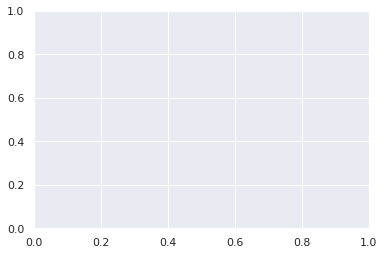